# 検定と信頼区間: 平均の比較

* 黒木玄
* 2022-06-16～2022-06-17

$
\newcommand\ds{\displaystyle}
\newcommand\op{\operatorname}
\newcommand\R{{\mathbb R}}
\newcommand\Z{{\mathbb Z}}
\newcommand\var{\op{var}}
\newcommand\cov{\op{cov}}
\newcommand\std{\op{std}}
\newcommand\eps{\varepsilon}
\newcommand\T[1]{T_{(#1)}}
\newcommand\bk{\bar\kappa}
\newcommand\X{{\mathscr X}}
\newcommand\CP{{\mathrm{CP}}}
\newcommand\Sterne{{\mathrm{Sterne}}}
\newcommand\Wilson{{\mathrm{Wilson}}}
\newcommand\Wald{{\mathrm{Wald}}}
\newcommand\LLR{{\mathrm{LLR}}}
\newcommand\pdf{\op{pdf}}
\newcommand\pmf{\op{pmf}}
\newcommand\cdf{\op{cdf}}
\newcommand\ecdf{\op{ecdf}}
\newcommand\quantile{\op{quantile}}
\newcommand\Binomial{\op{Binomial}}
\newcommand\Beta{\op{Beta}}
\newcommand\Normal{\op{Normal}}
\newcommand\Chisq{\op{Chisq}}
\newcommand\Chi{\op{Chi}}
\newcommand\TDist{\op{TDist}}
\newcommand\Chisq{\op{Chisq}}
\newcommand\pvalue{\op{pvalue}}
\newcommand\confint{\op{confint}}
\newcommand\credint{\op{credint}}
\newcommand\phat{\hat{p}}
\newcommand\SE{\op{SE}}
\newcommand\SEhat{\widehat{\SE}}
\newcommand\logistic{\op{logistic}}
\newcommand\logit{\op{logit}}
\newcommand\OR{\op{OR}}
\newcommand\ORhat{\widehat{\OR}}
\newcommand\RR{\op{RR}}
\newcommand\RRhat{\widehat{\RR}}
\newcommand\ha{\hat{a}}
\newcommand\hb{\hat{b}}
\newcommand\hc{\hat{c}}
\newcommand\hd{\hat{d}}
\newcommand\ta{\tilde{a}}
\newcommand\tb{\tilde{b}}
\newcommand\tc{\tilde{c}}
\newcommand\td{\tilde{d}}
\newcommand\tx{\tilde{x}}
\newcommand\phat{\hat{p}}
\newcommand\qhat{\hat{q}}
\newcommand\ptilde{\tilde{p}}
\newcommand\qtilde{\tilde{q}}
\newcommand\Wald{\op{Wald}}
\newcommand\Pearson{\op{Pearson}}
\newcommand\Fisher{\op{Fisher}}
\newcommand\Bayes{\op{Bayes}}
\newcommand\Welch{\op{Welch}}
\newcommand\FisherNoncentralHypergeometric{\op{FisherNoncentralHypergeometric}}
\newcommand\xbar{\bar{x}}
\newcommand\ybar{\bar{y}}
\newcommand\Xbar{\bar{X}}
\newcommand\Ybar{\bar{Y}}
\newcommand\dmu{{\varDelta\mu}}
$


このノートでは[Julia言語](https://julialang.org/)を使用している: 

* [Julia言語のインストールの仕方の一例](https://nbviewer.org/github/genkuroki/msfd28/blob/master/install.ipynb)

自明な誤りを見つけたら, 自分で訂正して読んで欲しい.  大文字と小文字の混同や書き直しが不完全な場合や符号のミスは非常によくある.

このノートに書いてある式を文字通りにそのまま読んで正しいと思ってしまうとひどい目に会う可能性が高い. しかし, 数が使われている文献には大抵の場合に文字通りに読むと間違っている式や主張が書いてあるので, 内容を理解した上で訂正しながら読んで利用しなければいけない. 実践的に数学を使う状況では他人が書いた式をそのまま信じていけない.

このノートの内容よりもさらに詳しいノートを自分で作ると勉強になるだろう.  膨大な時間を取られることになるが, このノートの内容に関係することで飯を食っていく可能性がある人にはそのためにかけた時間は無駄にならないと思われる.

<h1>目次<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#平均の差に関するP値と信頼区間" data-toc-modified-id="平均の差に関するP値と信頼区間-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>平均の差に関するP値と信頼区間</a></span><ul class="toc-item"><li><span><a href="#平均の差に関するP値と信頼区間を使って行いたいこと" data-toc-modified-id="平均の差に関するP値と信頼区間を使って行いたいこと-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>平均の差に関するP値と信頼区間を使って行いたいこと</a></span></li><li><span><a href="#平均の差の検定で使用されるP値の定義" data-toc-modified-id="平均の差の検定で使用されるP値の定義-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>平均の差の検定で使用されるP値の定義</a></span></li></ul></li><li><span><a href="#Welchの-t-検定のP値と信頼区間の計算例" data-toc-modified-id="Welchの-t-検定のP値と信頼区間の計算例-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Welchの t 検定のP値と信頼区間の計算例</a></span><ul class="toc-item"><li><span><a href="#必修問題:-Welchの-t-検定のP値と信頼区間の計算" data-toc-modified-id="必修問題:-Welchの-t-検定のP値と信頼区間の計算-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>必修問題: Welchの t 検定のP値と信頼区間の計算</a></span><ul class="toc-item"><li><span><a href="#WolframAlphaによるWelchの-t-検定のP値と信頼区間の計算の必修問題の解答例" data-toc-modified-id="WolframAlphaによるWelchの-t-検定のP値と信頼区間の計算の必修問題の解答例-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>WolframAlphaによるWelchの t 検定のP値と信頼区間の計算の必修問題の解答例</a></span></li><li><span><a href="#Julia言語によるWelchの-t-検定のP値と信頼区間の計算の必修問題の解答例" data-toc-modified-id="Julia言語によるWelchの-t-検定のP値と信頼区間の計算の必修問題の解答例-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Julia言語によるWelchの t 検定のP値と信頼区間の計算の必修問題の解答例</a></span></li><li><span><a href="#Julia言語による必修問題のデータの視覚化" data-toc-modified-id="Julia言語による必修問題のデータの視覚化-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>Julia言語による必修問題のデータの視覚化</a></span></li><li><span><a href="#Julia言語による必修問題のP値函数の視覚化" data-toc-modified-id="Julia言語による必修問題のP値函数の視覚化-2.1.4"><span class="toc-item-num">2.1.4&nbsp;&nbsp;</span>Julia言語による必修問題のP値函数の視覚化</a></span></li><li><span><a href="#R言語によるWelchの-t-検定のP値と信頼区間の計算の必修問題の解答例" data-toc-modified-id="R言語によるWelchの-t-検定のP値と信頼区間の計算の必修問題の解答例-2.1.5"><span class="toc-item-num">2.1.5&nbsp;&nbsp;</span>R言語によるWelchの t 検定のP値と信頼区間の計算の必修問題の解答例</a></span></li><li><span><a href="#Welchの-t-検定のP値と信頼区間の計算の必修問題の解答例" data-toc-modified-id="Welchの-t-検定のP値と信頼区間の計算の必修問題の解答例-2.1.6"><span class="toc-item-num">2.1.6&nbsp;&nbsp;</span>Welchの t 検定のP値と信頼区間の計算の必修問題の解答例</a></span></li></ul></li><li><span><a href="#必修問題:-12歳の男子と女子の平均身長の差" data-toc-modified-id="必修問題:-12歳の男子と女子の平均身長の差-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>必修問題: 12歳の男子と女子の平均身長の差</a></span><ul class="toc-item"><li><span><a href="#WolframAlphaによる12歳の男子と女子の平均身長の差に関する必修問題の解答例" data-toc-modified-id="WolframAlphaによる12歳の男子と女子の平均身長の差に関する必修問題の解答例-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>WolframAlphaによる12歳の男子と女子の平均身長の差に関する必修問題の解答例</a></span></li><li><span><a href="#Julia言語による12歳の男子と女子の平均身長の差に関する必修問題の解答例" data-toc-modified-id="Julia言語による12歳の男子と女子の平均身長の差に関する必修問題の解答例-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Julia言語による12歳の男子と女子の平均身長の差に関する必修問題の解答例</a></span></li><li><span><a href="#Julia言語による12歳の男子と女子の平均身長の差のP値函数の視覚化" data-toc-modified-id="Julia言語による12歳の男子と女子の平均身長の差のP値函数の視覚化-2.2.3"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span>Julia言語による12歳の男子と女子の平均身長の差のP値函数の視覚化</a></span></li><li><span><a href="#R言語による12歳の男子と女子の平均身長の差に関する必修問題の解答例" data-toc-modified-id="R言語による12歳の男子と女子の平均身長の差に関する必修問題の解答例-2.2.4"><span class="toc-item-num">2.2.4&nbsp;&nbsp;</span>R言語による12歳の男子と女子の平均身長の差に関する必修問題の解答例</a></span></li><li><span><a href="#12歳の男子と女子の平均身長の差に関する必修問題の解答例" data-toc-modified-id="12歳の男子と女子の平均身長の差に関する必修問題の解答例-2.2.5"><span class="toc-item-num">2.2.5&nbsp;&nbsp;</span>12歳の男子と女子の平均身長の差に関する必修問題の解答例</a></span></li></ul></li></ul></li><li><span><a href="#Welchの-t-検定での第一種の過誤の確率の視覚化" data-toc-modified-id="Welchの-t-検定での第一種の過誤の確率の視覚化-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Welchの t 検定での第一種の過誤の確率の視覚化</a></span></li><li><span><a href="#Welchの-t-検定で使う自由度の式の導出" data-toc-modified-id="Welchの-t-検定で使う自由度の式の導出-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Welchの t 検定で使う自由度の式の導出</a></span></li></ul></div>

In [1]:
ENV["LINES"], ENV["COLUMNS"] = 100, 100
using Base.Threads
using BenchmarkTools
using DataFrames
using Distributions
using LinearAlgebra
using Memoization
using Printf
using QuadGK
using RCall
using Random
Random.seed!(4649373)
using Roots
using SpecialFunctions
using StaticArrays
using StatsBase
using StatsFuns
using StatsPlots
default(fmt = :png, size = (400, 250),
    titlefontsize = 10, plot_titlefontsize = 12)
using SymPy

In [2]:
# Override the Base.show definition of SymPy.jl:
# https://github.com/JuliaPy/SymPy.jl/blob/29c5bfd1d10ac53014fa7fef468bc8deccadc2fc/src/types.jl#L87-L105

@eval SymPy function Base.show(io::IO, ::MIME"text/latex", x::SymbolicObject)
    print(io, as_markdown("\\displaystyle " *
            sympy.latex(x, mode="plain", fold_short_frac=false)))
end
@eval SymPy function Base.show(io::IO, ::MIME"text/latex", x::AbstractArray{Sym})
    function toeqnarray(x::Vector{Sym})
        a = join(["\\displaystyle " *
                sympy.latex(x[i]) for i in 1:length(x)], "\\\\")
        """\\left[ \\begin{array}{r}$a\\end{array} \\right]"""
    end
    function toeqnarray(x::AbstractArray{Sym,2})
        sz = size(x)
        a = join([join("\\displaystyle " .* map(sympy.latex, x[i,:]), "&")
                for i in 1:sz[1]], "\\\\")
        "\\left[ \\begin{array}{" * repeat("r",sz[2]) * "}" * a * "\\end{array}\\right]"
    end
    print(io, as_markdown(toeqnarray(x)))
end

In [3]:
safemul(x, y) = x == 0 ? x : isinf(x) ? typeof(x)(Inf) : x*y
safediv(x, y) = x == 0 ? x : isinf(y) ? zero(y) : x/y

x ⪅ y = x < y || x ≈ y

mypdf(dist, x) = pdf(dist, x)
mypdf(dist::DiscreteUnivariateDistribution, x) = pdf(dist, round(Int, x))

distname(dist::Distribution) = replace(string(dist), r"{.*}" => "")
myskewness(dist) = skewness(dist)
mykurtosis(dist) = kurtosis(dist)
function standardized_moment(dist::ContinuousUnivariateDistribution, m)
    μ, σ = mean(dist), std(dist)
    quadgk(x -> (x - μ)^m * pdf(dist, x), extrema(dist)...)[1] / σ^m
end
myskewness(dist::MixtureModel{Univariate, Continuous}) =
    standardized_moment(dist, 3)
mykurtosis(dist::MixtureModel{Univariate, Continuous}) =
    standardized_moment(dist, 4) - 3

mykurtosis (generic function with 2 methods)

In [4]:
function tvalue_welch(m, x̄, sx², n, ȳ, sy²; Δμ=0)
    (x̄ - ȳ - Δμ) / √(sx²/m + sy²/n)
end

function tvalue_welch(x, y; Δμ=0)
    m, x̄, sx² = length(x), mean(x), var(x)
    n, ȳ, sy² = length(y), mean(y), var(y)
    tvalue_welch(m, x̄, sx², n, ȳ, sy²; Δμ)
end

function degree_of_freedom_welch(m, sx², n, sy²)
    (sx²/m + sy²/n)^2 / ((sx²/m)^2/(m-1) + (sy²/n)^2/(n-1))
end

function degree_of_freedom_welch(x, y)
    m, sx² = length(x), var(x)
    n, sy² = length(y), var(y)
    degree_of_freedom_welch(m, sx², n, sy²)
end

function pvalue_welch(m, x̄, sx², n, ȳ, sy²; Δμ=0)
    t = tvalue_welch(m, x̄, sx², n, ȳ, sy²; Δμ)
    ν = degree_of_freedom_welch(m, sx², n, sy²)
    2ccdf(TDist(ν), abs(t))
end

function pvalue_welch(x, y; Δμ=0)
    m, x̄, sx² = length(x), mean(x), var(x)
    n, ȳ, sy² = length(y), mean(y), var(y)
    pvalue_welch(m, x̄, sx², n, ȳ, sy²; Δμ)
end

function confint_welch(m, x̄, sx², n, ȳ, sy²; α=0.05)
    ν = degree_of_freedom_welch(m, sx², n, sy²)
    c = quantile(TDist(ν), 1-α/2)
    SEhat = √(sx²/m + sy²/n)
    [x̄-ȳ-c*SEhat, x̄-ȳ+c*SEhat]
end

function confint_welch(x, y; α=0.05)
    m, x̄, sx² = length(x), mean(x), var(x)
    n, ȳ, sy² = length(y), mean(y), var(y)
    confint_welch(m, x̄, sx², n, ȳ, sy²; α)
end

confint_welch (generic function with 2 methods)

In [5]:
function plot_prob_type_I_error_welch(;
        distx=Normal(0,1), m=10,
        disty=Normal(0, 2), n=20,
        L=10^6, kwargs...)
    Δμ = mean(distx) - mean(disty)
    pval = similar(zeros(), L)
    tmpx = [similar(zeros(), m) for _ in 1:nthreads()]
    tmpy = [similar(zeros(), n) for _ in 1:nthreads()]
    @threads for i in 1:L
        x = rand!(distx, tmpx[threadid()])
        y = rand!(disty, tmpy[threadid()])
        pval[i] = pvalue_welch(x, y; Δμ)
    end
    ecdf_pval = ecdf(pval)
    f(x) = ecdf_pval(x)
    
    P = plot(f, 0, 1; label="")
    plot!(identity, 0, 1; label="", ls=:dot)
    plot!(; xtick=0:0.1:1, ytick=0:0.1:1)
    
    Q = plot(f, 0, 0.1; label="")
    plot!(identity, 0, 0.1; label="", ls=:dot)
    plot!(; xtick=0:0.01:1, ytick=0:0.01:1)

    plot(P, Q; size=(600, 300))
    plot!(; plot_title="$(distname(distx)), m=$m vs. $(distname(disty)), n=$n")
    plot!(; tickfontsize=6, plot_titlefontsize=9)
end

plot_prob_type_I_error_welch (generic function with 1 method)

## 平均の差に関するP値と信頼区間

### 平均の差に関するP値と信頼区間を使って行いたいこと

以下のようなことを行いたい.

(1) 日本にいる12歳の男子と女子をそれぞれ $m$ 人と $n$ 人無作為抽出して, 身長を測って得た数値のデータをそれぞれ $x_1,\ldots,x_m$, $y_1,\ldots,y_n$ と書くことにする.  そのようなデータを用いて日本にいる12歳の男子と女子の平均身長の差がどれだけあるか(もしくはないか)を推定したい.

(2) 薬Xの効き目を調べるために, 同一の母集団から $m+n$ 人を無作為に選んで, ランダムに選んだそのうち $m$ 人は薬Xを与え, 残りの $n$ 人にはプラセボ(偽薬)を与えた.  そして, $m+n$ 人について治療効果を表す指標の数値を測定し, 薬Xを与えた $m$ 人分の数値は $x_1,\ldots,x_m$ でプラセボを与えた $n$ 人分の数値は $y_1,\ldots,y_n$ であったとする. そのデータから, 薬Xを与えた場合の治療効果を表す指標の平均値と与えなかった場合の治療効果を表す指標の平均値の差がどうなっているかについて推定したい.

目標は2つの群の平均の差の信頼区間の構成である.

そのためには, 検定と信頼区間の表裏一体性より, P値を適切に定義すればよい.

### 平均の差の検定で使用されるP値の定義

__データ:__　$m$ 個の実数値 $x_1,\ldots,x_m$ と $n$ 個の実数値 $y_1,\ldots,y_n$.

$x_i$ 達と $y_i$ 達の標本平均と不偏分散を以下のように書くことにする:

$$
\begin{alignedat}{2}
&
\xbar = \frac{1}{m}\sum_{i=1}^m x_i, \quad
& &
s_x^2 = \frac{1}{m-1}\sum_{i=1}^m (x_i - \xbar)^2,
\\ &
\ybar = \frac{1}{n}\sum_{i=1}^n y_i, \quad
& &
s_y^2 = \frac{1}{n-1}\sum_{i=1}^m (y_i - \ybar)^2.
\end{alignedat}
$$

__統計モデル:__ 平均 $\mu_x$ と分散 $\sigma_x^2$ を持つ確率分布 $D_x$ のサイズ $m$ の標本分布 $D_x^m$ と平均 $\mu_y$ と分散 $\sigma_y^2$ を持つ確率分布 $D_y$ のサイズ $n$ の標本分布 $D_y^n$ の直積分布 $D_x^m\times D_y^n$ を統計モデルとして採用する.

以下では簡単のため $D_x$ も $D_y$ も連続分布であると仮定し, それぞれの確率密度函数を $p_x(x)$, $p_y(y)$ と書くことにする.  このとき, 統計モデル $D_x^m\times D_y^n$ の確率密度函数は

$$
p(x_1,\ldots,x_m,y_1,\ldots,y_n) = p_x(x_1)\cdots p_x(x_m)\cdot p_y(y_1)\cdots p_y(y_n)
$$

になる.  この確率分布に従う確率変数達(独立になる)を $X_1,\ldots,X_m,Y_1,\ldots,Y_n$ と書き, $X_i$ 達と $Y_i$ 達の標本平均と不偏分散を以下のように書くことにする:

$$
\begin{alignedat}{2}
&
\Xbar = \frac{1}{m}\sum_{i=1}^m X_i, \quad
& &
S_x^2 = \frac{1}{m-1}\sum_{i=1}^m (X_i - \Xbar)^2,
\\ &
\Ybar = \frac{1}{n}\sum_{i=1}^n Y_i, \quad
& &
S_y^2 = \frac{1}{n-1}\sum_{i=1}^m (Y_i - \Ybar)^2.
\end{alignedat}
$$

__この統計モデルが適用可能な場合:__ 上の統計モデルでは, データの数値 $x_i$, $y_i$ の生成のされ方のモデル化である $X_i$, $Y_i$ 達が独立な確率変数になっており, $X_i$ 達は同じ分布に従い, $Y_i$ 達も同じ分布に従うが, $X_i$ 達と $Y_i$ 達が従う分布は違っていてよいという設定になっている.  データの生成のされ方がこの条件を満たしていない場合には, 上の統計モデルの適用は不適切になる.

例えば, $m=n$ でデータ中の $x_i$ の値と $y_i$ の値が関係している場合には上のモデルの使用は不適切になる.  例えば, $i$ 番目の人の薬を与える前の数値が $x_i$ で薬を与えた後の数値が $y_i$ の場合には $y_i$ の値は $x_i$ の値に依存して決まるので, このような場合に上のモデルの適用は不適切になる. そのような場合には, 例えばそれらの差に平均の値に関する検定や信頼区間を使用すればよい.

__検定したい仮説:__　$\mu_x - \mu_y = \dmu$　($\dmu$ は具体的な数値).

__中心極限定理:__ モデル内確率変数としての2つの標本平均達の分布について, 中心極限定理による正規分布近似が使えると仮定する.

$\Xbar$, $\Ybar$ の平均(期待値)と分散は以下のようになる:

$$
E[\Xbar] = \mu_x, \quad
E[\Ybar] = \mu_y, \quad
\var(\Xbar) = \frac{\sigma_x^2}{m}, \quad
\var(\Ybar) = \frac{\sigma_y^2}{n}.
$$

さらに, $\Xbar$ と $\Ybar$ が確率変数として独立であることより,

$$
E[\Xbar - \Ybar] = \mu_x - \mu_y, \quad
\var(\Xbar - \Ybar) = \frac{\sigma_x^2}{m} + \frac{\sigma_y^2}{n}.
$$

さらに, 中心極限定理より, 次の近似が使える:

$$
\Xbar - \Ybar \sim
\Normal\left(\mu_x - \mu_y,\; \sqrt{\frac{\sigma_x^2}{m} + \frac{\sigma_y^2}{n}}\right),
\quad\text{approximately}.
$$

すなわち,

$$
\frac
{(\Xbar - \Ybar) - (\mu_x - \mu_y)}
{\ds \sqrt{\frac{\sigma_x^2}{m} + \frac{\sigma_y^2}{n}}} \sim \Normal(0,1),
\quad\text{approximately}.
$$

__大数の法則:__ モデル内確率変数としての不偏分散 $S_x^2$, $S_y^2$ でモデルの分散 $\sigma_x^2$, $\sigma_y^2$ がよく近似されていると仮定する.

このとき, 次の近似が使える.

$$
T :=
\frac
{(\Xbar - \Ybar) - (\mu_x - \mu_y)}
{\ds \sqrt{\frac{S_x^2}{m} + \frac{S_y^2}{n}}} \sim \Normal(0,1),
\quad\text{approximately}.
$$

__P値の定義:__ これを用いて, 具体的に与えられた数値 $\dmu$ に関する仮説「$\mu_x - \mu_y = \dmu$」のP値を以下のように定義する.  まず, データの数値の $t$ 値 $t=t(\dmu)$ を次のように定義する: 

$$
t = t(\dmu) =
\frac
{(\xbar - \ybar) - \dmu}
{\ds \sqrt{\frac{s_x^2}{m} + \frac{s_y^2}{n}}}.
$$

仮説「$\mu_x - \mu_y = \dmu$」のP値を, その仮説下のモデル内の確率変数としての $t$ 値 $T$ の値の絶対値がデータから計算した $t$ 値 $t=t(\dmu)$ の絶対値以上になる確率の近似値として定義する:

$$
\pvalue_{\Normal}(\xbar, \ybar, s_x^2, s_y^2|m,n, \mu_x-\mu_y=\dmu) =
2(1-\cdf(\Normal(0,1), |t(\dmu)|)).
$$

しかし, 実際に使用されるのは次に定義する $t$ 分布を使って定義されたP値の方である.

__t分布を使って補正されたP値の定義:__ 上のP値の $t$ 分布版を定義しよう.

天下り的になってしまうが, 自由度 $\nu$ を次のように定義する(これの導出は別の節で行う):

$$
\nu =
\frac
{\ds \left(s_x^2/m + s_y^2/n\right)^2}
{\ds \frac{(s_x^2/m)^2}{m-1} + \frac{(s_y^2/n)^2}{n-1}}.
$$

仮に $s_x^2=s_y^2$, $m=n$ だとすると, $\nu = 2n-2$ となる. 

一般にこの $\nu$ は整数にならないがそのまま用いる.

この $\nu$ を用いて $t$ 分布を使って計算されるP値を次のように定める:

$$
\pvalue_{\Welch}(\xbar, \ybar, s_x^2, s_y^2|m,n, \mu_x-\mu_y=\dmu) =
2(1-\cdf(\TDist(\nu), |t(\dmu)|)).
$$

以下ではこれを使うことにする. このP値は __Welchの t 検定__ のP値である.

$\nu$ の定義を覚える必要はない.  $m,n$ が大きいならば, $\nu$ も大きくなり, 自由度 $\nu$ の $t$ 分布 $\TDist(\nu)$ は標準正規分布 $\Normal(0,1)$ でよく近似されるようになるので, $\nu$ の値がどうであるかを実質的に気にする必要がなくなることにも注意せよ.  この $t$ 分布による補正が有効なのは特別な場合に限るが, 有効でない場合にも害はないのでこちらの方を使うことにする.

__信頼区間:__ Welchの $t$ 検定のP値から定まる信頼区間は以下のように書ける.

まず, 自由度 $\nu$ の $t$ 分布において $t_{\nu,\alpha/2}$ 以上になる確率は $\alpha/2$ になると仮定する:

$$
t_{\nu,\alpha/2} = \quantile(\TDist(\nu), 1 - \alpha/2).
$$

このとき, 平均の差 $\mu_x-\mu_y$ の信頼度 $1-\alpha$ の信頼区間が次のように定義される:

$$
\confint_{\Welch}(\xbar, \ybar, s_x^2, s_y^2|m,n,\alpha) =
\left[
\xbar - \ybar - t_{\nu,\alpha/2}\sqrt{\frac{s_x^2}{m} + \frac{s_y^2}{n}},\;
\xbar - \ybar + t_{\nu,\alpha/2}\sqrt{\frac{s_x^2}{m} + \frac{s_y^2}{n}}\;
\right].
$$



## Welchの t 検定のP値と信頼区間の計算例

### 必修問題: Welchの t 検定のP値と信頼区間の計算

サイズが $m = 20$, $n = 30$ のデータ

```
x = [19.2, 22.7, 7.8, 138.5, 70.5, 44.3, 84.0, 35.6, 72.4, 23.9,
    11.7, 26.6, 73.8, 118.3, 54.2, 57.6, 40.5, 117.4, 102.3, 67.6]

y = [44.3, 66.9, 62.9, 78.4, 71.2, 32.5, 111.4, 38.2, 68.2, 50.7,
    74.5, 46.2, 65.7, 58.7, 42.5, 57.4, 63.0, 67.9, 72.1, 117.7,
    124.1, 48.9, 91.8, 80.8, 60.2, 76.8, 76.3, 59.9, 70.7, 46.4]
```

について以下を求めよ.

(1) 仮説 $\mu_x - \mu_y = 0$ のP値.

(2) 仮説 $\mu_x - \mu_y = -30$ のP値.

(3) Welchの $t$ 検定に付随する $95\%$ 信頼区間.

#### WolframAlphaによるWelchの t 検定のP値と信頼区間の計算の必修問題の解答例

`mean {19.2, 22.7, 7.8, 138.5, 70.5, 44.3, 84.0, 35.6, 72.4, 23.9, 11.7, 26.6, 73.8, 118.3, 54.2, 57.6, 40.5, 117.4, 102.3, 67.6}` → [実行](https://www.wolframalpha.com/input?i=mean+%7B19.2%2C+22.7%2C+7.8%2C+138.5%2C+70.5%2C+44.3%2C+84.0%2C+35.6%2C+72.4%2C+23.9%2C+11.7%2C+26.6%2C+73.8%2C+118.3%2C+54.2%2C+57.6%2C+40.5%2C+117.4%2C+102.3%2C+67.6%7D) → 59.445 $= \xbar$

`var {19.2, 22.7, 7.8, 138.5, 70.5, 44.3, 84.0, 35.6, 72.4, 23.9, 11.7, 26.6, 73.8, 118.3, 54.2, 57.6, 40.5, 117.4, 102.3, 67.6}` → [実行](https://www.wolframalpha.com/input?i=var+%7B19.2%2C+22.7%2C+7.8%2C+138.5%2C+70.5%2C+44.3%2C+84.0%2C+35.6%2C+72.4%2C+23.9%2C+11.7%2C+26.6%2C+73.8%2C+118.3%2C+54.2%2C+57.6%2C+40.5%2C+117.4%2C+102.3%2C+67.6%7D) → 1448.48 $= s_x^2$

`mean {44.3, 66.9, 62.9, 78.4, 71.2, 32.5, 111.4, 38.2, 68.2, 50.7, 74.5, 46.2, 65.7, 58.7, 42.5, 57.4, 63.0, 67.9, 72.1, 117.7, 124.1, 48.9, 91.8, 80.8, 60.2, 76.8, 76.3, 59.9, 70.7, 46.4}` → [実行](https://www.wolframalpha.com/input?i=mean+%7B44.3%2C+66.9%2C+62.9%2C+78.4%2C+71.2%2C+32.5%2C+111.4%2C+38.2%2C+68.2%2C+50.7%2C+74.5%2C+46.2%2C+65.7%2C+58.7%2C+42.5%2C+57.4%2C+63.0%2C+67.9%2C+72.1%2C+117.7%2C+124.1%2C+48.9%2C+91.8%2C+80.8%2C+60.2%2C+76.8%2C+76.3%2C+59.9%2C+70.7%2C+46.4%7D) → 67.5433 $= \ybar$

`var {44.3, 66.9, 62.9, 78.4, 71.2, 32.5, 111.4, 38.2, 68.2, 50.7, 74.5, 46.2, 65.7, 58.7, 42.5, 57.4, 63.0, 67.9, 72.1, 117.7, 124.1, 48.9, 91.8, 80.8, 60.2, 76.8, 76.3, 59.9, 70.7, 46.4}` → [実行](https://www.wolframalpha.com/input?i=var+%7B44.3%2C+66.9%2C+62.9%2C+78.4%2C+71.2%2C+32.5%2C+111.4%2C+38.2%2C+68.2%2C+50.7%2C+74.5%2C+46.2%2C+65.7%2C+58.7%2C+42.5%2C+57.4%2C+63.0%2C+67.9%2C+72.1%2C+117.7%2C+124.1%2C+48.9%2C+91.8%2C+80.8%2C+60.2%2C+76.8%2C+76.3%2C+59.9%2C+70.7%2C+46.4%7D) → 479.481 $= s_y^2$

`(v/m+w/n)^2/((v/m)^2/(m-1)+(w/n)^2/(n-1)) where {m=20, x=59.445, v=1448.48, n=30, y=67.5433, w=479.481}` → [実行](https://www.wolframalpha.com/input?i=%28v%2Fm%2Bw%2Fn%29%5E2%2F%28%28v%2Fm%29%5E2%2F%28m-1%29%2B%28w%2Fn%29%5E2%2F%28n-1%29%29+where+%7Bm%3D20%2C+x%3D59.445%2C+v%3D1448.48%2C+n%3D30%2C+y%3D67.5433%2C+w%3D479.481%7D) → 27.4358 $=\nu$ (自由度)

(1)

`(x-y-0)/sqrt(v/m+w/n) where {m=20, x=59.445, v=1448.48, n=30, y=67.5433, w=479.481}` → [実行](https://www.wolframalpha.com/input?i=%28x-y-0%29%2Fsqrt%28v%2Fm%2Bw%2Fn%29+where+%7Bm%3D20%2C+x%3D59.445%2C+v%3D1448.48%2C+n%3D30%2C+y%3D67.5433%2C+w%3D479.481%7D) → -0.861294 $=t$ (t値)

`2(1 - cdf(TDistribution(27.4358), 0.861294))` → [実行](https://www.wolframalpha.com/input?i=2%281+-+cdf%28TDistribution%2827.4358%29%2C+0.861294%29%29) → 0.396541 ((1)のP値)

(2)

`(x-y+30)/sqrt(v/m+w/n) where {m=20, x=59.445, v=1448.48, n=30, y=67.5433, w=479.481}` → [実行](https://www.wolframalpha.com/input?i=%28x-y%2B30%29%2Fsqrt%28v%2Fm%2Bw%2Fn%29+where+%7Bm%3D20%2C+x%3D59.445%2C+v%3D1448.48%2C+n%3D30%2C+y%3D67.5433%2C+w%3D479.481%7D) → 2.32935 $=t$ (t値)

`2(1 - cdf(TDistribution(27.4358), 2.32935))` → [実行](https://www.wolframalpha.com/input?i=2%281+-+cdf%28TDistribution%2827.4358%29%2C+2.32935%29%29) → 0.0274389 ((2)のP値)

(3)

`quantile(TDistribution(27.4358), 0.975)` → [実行](https://www.wolframalpha.com/input?i=quantile%28TDistribution%2827.4358%29%2C+0.975%29) → 2.05031 $=t_{\nu,\alpha/2}$

`{x-y-2.05031*sqrt(v/m+w/n), x-y+2.05031*sqrt(v/m+w/n)} where {m=20, x=59.445, v=1448.48, n=30, y=67.5433, w=479.481}` → [実行](https://www.wolframalpha.com/input?i=%7Bx-y-2.05031*sqrt%28v%2Fm%2Bw%2Fn%29%2C+x-y%2B2.05031*sqrt%28v%2Fm%2Bw%2Fn%29%7D+where+%7Bm%3D20%2C+x%3D59.445%2C+v%3D1448.48%2C+n%3D30%2C+y%3D67.5433%2C+w%3D479.481%7D) → {-27.3763, 11.1797} ((3)の信頼区間)

#### Julia言語によるWelchの t 検定のP値と信頼区間の計算の必修問題の解答例

函数の定義についてはこのノートの最初の方を見よ.

In [6]:
x = [19.2, 22.7, 7.8, 138.5, 70.5, 44.3, 84.0, 35.6, 72.4, 23.9,
    11.7, 26.6, 73.8, 118.3, 54.2, 57.6, 40.5, 117.4, 102.3, 67.6]
y = [44.3, 66.9, 62.9, 78.4, 71.2, 32.5, 111.4, 38.2, 68.2, 50.7,
    74.5, 46.2, 65.7, 58.7, 42.5, 57.4, 63.0, 67.9, 72.1, 117.7,
    124.1, 48.9, 91.8, 80.8, 60.2, 76.8, 76.3, 59.9, 70.7, 46.4]
@show length(x)
@show mean(x)
@show std(x)
@show length(y)
@show mean(y)
@show std(y)
@show degree_of_freedom_welch(x, y);

length(x) = 20
mean(x) = 59.44499999999999
std(x) = 38.05893594496774
length(y) = 30
mean(y) = 67.54333333333334
std(y) = 21.897058270907998
degree_of_freedom_welch(x, y) = 27.43582631782945


In [7]:
# (1)
@show tvalue_welch(x, y; Δμ = 0)
@show pvalue_welch(x, y; Δμ = 0);

tvalue_welch(x, y; Δμ = 0) = -0.8612965858138025
pvalue_welch(x, y; Δμ = 0) = 0.39653998689489345


In [8]:
# (2)
@show tvalue_welch(x, y; Δμ = -30)
@show pvalue_welch(x, y; Δμ = -30);

tvalue_welch(x, y; Δμ = -30) = 2.3293472801356576
pvalue_welch(x, y; Δμ = -30) = 0.027439073239531347


In [9]:
# (3)
@show confint_welch(x, y; α=0.05);

confint_welch(x, y; α = 0.05) = [-27.376321534615272, 11.179654867948585]


#### Julia言語による必修問題のデータの視覚化

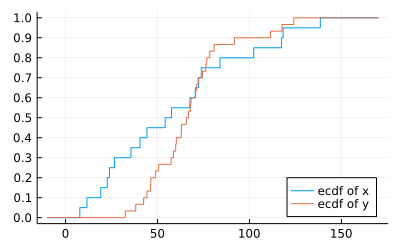

In [10]:
ecdf_x, ecdf_y = ecdf(x), ecdf(y)
plot(; legend=:bottomright, ytick=0:0.1:1)
plot!(x -> ecdf_x(x), -10, 170; label="ecdf of x")
plot!(x -> ecdf_y(x), -10, 170; label="ecdf of y")

$x$ に対してデータ中の $x$ 以下の要素の個数の割合を対応させる函数をデータの経験累積分布函数(empirical cumulative distribution function, ecdf)と呼ぶ.  上のグラフはデータ $x,y$ の経験分布函数のプロットである.

経験分布函数のプロットには, ヒストグラムと違って, ビン(横軸の分割)の仕方に神経を使わずにプロットしても問題がないという利点がある.  欠点は直観的に意味を把握できず, 少し考えなければグラフを適切に解釈できないことである.

上のecdf達のグラフからデータxはデータyよりも広く分布していることがわかる.

#### Julia言語による必修問題のP値函数の視覚化

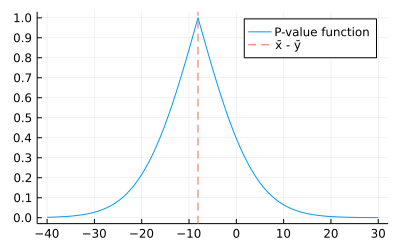

In [11]:
plot(Δμ -> pvalue_welch(x, y; Δμ), -40, 30; label="P-value function")
vline!([mean(x)-mean(y)]; label="x̄ - ȳ", ls=:dash)
plot!(; xtick=-100:10:100, ytick=0:0.1:1)

#### R言語によるWelchの t 検定のP値と信頼区間の計算の必修問題の解答例



In [12]:
# (1), (3)
@rput x y
R"""t.test(x, y)"""

RObject{VecSxp}

	Welch Two Sample t-test

data:  x and y
t = -0.8613, df = 27.436, p-value = 0.3965
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -27.37632  11.17965
sample estimates:
mean of x mean of y 
 59.44500  67.54333 



In [13]:
# (2), (3)
R"""t.test(x, y, mu=-30)"""

RObject{VecSxp}

	Welch Two Sample t-test

data:  x and y
t = 2.3293, df = 27.436, p-value = 0.02744
alternative hypothesis: true difference in means is not equal to -30
95 percent confidence interval:
 -27.37632  11.17965
sample estimates:
mean of x mean of y 
 59.44500  67.54333 



#### Welchの t 検定のP値と信頼区間の計算の必修問題の解答例

(1) 0.3965

(2) 0.02744

(3) \[-27.38, 11.18\]

### 必修問題: 12歳の男子と女子の平均身長の差

[国民健康・栄養調査14 身長・体重の平均値及び標準偏差](https://www.e-stat.go.jp/dbview?sid=0003224177)における2012年と2018年の12歳の男女のデータによれば, 男子 $m$ 人の身長のデータの標本平均 $\xbar$ と標本分散の平方根 $s_x$ と女子 $n$ 人の身長のデータの標本平均 $\ybar$ と不偏分散の平方根 $s_y$ は以下の値になった.

$$
\begin{array}{|c|r|c|c|r|c|c|}
\hline
& m & \xbar & s_x & n & \ybar & s_y \\
\hline
2012 & 111 & 149.9\op{cm} & 7.1\op{cm} & 131 & 151.1\op{cm} & 6.3\op{cm} \\
\hline
2018 &  31 & 153.1\op{cm} & 7.9\op{cm} &  19 & 150.1\op{cm} & 5.7\op{cm} \\
\hline
\end{array}
$$

このデータについて以下を計算せよ:

(1) 2012年のデータについて, 仮説「平均の差は $\mu_x - \mu_y = 0$ である」に関するWelchの $t$ 検定のP値.

(2) 2012年のデータについて, 平均の差 $\mu_x - \mu_y$ に関するWelchの $t$ 検定に付随する $95\%$ 信頼区間.

(3) 2018年のデータについて, 仮説「平均の差は $\mu_x - \mu_y = 0$ である」に関するWelchの $t$ 検定のP値.

(4) 2018年のデータについて, 平均の差 $\mu_x - \mu_y$ に関するWelchの $t$ 検定に付随する $95\%$ 信頼区間.

(5) 信頼区間の幅がどのようにどのような理由で変わったか?

#### WolframAlphaによる12歳の男子と女子の平均身長の差に関する必修問題の解答例

以下 $\xbar, s_x^2, \ybar, s_y^2$ をそれぞれ `x`, `v`, `y`, `w` と書く.

(1)

`(x-y)/sqrt(v/m+w/n) where {m=111 x=149.9, v=7.1^2, n=131, y=151.1, w=6.3^2}` → [実行](https://www.wolframalpha.com/input?i=%28x-y%29%2Fsqrt%28v%2Fm%2Bw%2Fn%29+where+%7Bm%3D111+x%3D149.9%2C+v%3D7.1%5E2%2C+n%3D131%2C+y%3D151.1%2C+w%3D6.3%5E2%7D) → -1.37911 $=t$ (t値)

`(v/m+w/n)^2/((v/m)^2/(m-1)+(w/n)^2/(n-1)) where {m=111 x=149.9, v=7.1^2, n=131, y=151.1, w=6.3^2}` → [実行](https://www.wolframalpha.com/input?i=%28v%2Fm%2Bw%2Fn%29%5E2%2F%28%28v%2Fm%29%5E2%2F%28m-1%29%2B%28w%2Fn%29%5E2%2F%28n-1%29%29+where+%7Bm%3D111+x%3D149.9%2C+v%3D7.1%5E2%2C+n%3D131%2C+y%3D151.1%2C+w%3D6.3%5E2%7D) → 222.089 $=\nu$ (自由度)

`2(1 - cdf(TDistribution(222.089), 1.37911))` → [実行](https://www.wolframalpha.com/input?i=2%281+-+cdf%28TDistribution%28222.089%29%2C+1.37911%29%29) → 0.169248 (P値)

(2)

`quantile(TDistribution(222.089), 0.975)` → [実行](https://www.wolframalpha.com/input?i=quantile%28TDistribution%28222.089%29%2C+0.975%29) → 1.9707 $=t_{\nu,\alpha/2}$

`{x-y-1.9707*sqrt(v/m+w/n), x-y+1.9707*sqrt(v/m+w/n)} where {m=111 x=149.9, v=7.1^2, n=131, y=151.1, w=6.3^2}` → [実行](https://www.wolframalpha.com/input?i=%7Bx-y-1.9707*sqrt%28v%2Fm%2Bw%2Fn%29%2C+x-y%2B1.9707*sqrt%28v%2Fm%2Bw%2Fn%29%7D+where+%7Bm%3D111+x%3D149.9%2C+v%3D7.1%5E2%2C+n%3D131%2C+y%3D151.1%2C+w%3D6.3%5E2%7D) → {-2.91476, 0.51476} (95%信頼区間)

(3)

`(x-y)/sqrt(v/m+w/n) where {m=31, x=153.1, v=7.9^2, n=19, y=150.1, w=5.7^2}` → [実行](https://www.wolframalpha.com/input?i=%28x-y%29%2Fsqrt%28v%2Fm%2Bw%2Fn%29+where+%7Bm%3D31%2C+x%3D153.1%2C+v%3D7.9%5E2%2C+n%3D19%2C+y%3D150.1%2C+w%3D5.7%5E2%7D) → 1.55475 $=t$ (t値)

`(v/m+w/n)^2/((v/m)^2/(m-1)+(w/n)^2/(n-1)) where {m=31, x=153.1, v=7.9^2, n=19, y=150.1, w=5.7^2}` → [実行](https://www.wolframalpha.com/input?i=%28v%2Fm%2Bw%2Fn%29%5E2%2F%28%28v%2Fm%29%5E2%2F%28m-1%29%2B%28w%2Fn%29%5E2%2F%28n-1%29%29+where+%7Bm%3D31%2C+x%3D153.1%2C+v%3D7.9%5E2%2C+n%3D19%2C+y%3D150.1%2C+w%3D5.7%5E2%7D) → 46.5881 $=\nu$ (自由度)

`2(1 - cdf(TDistribution(46.5881), 1.55475))` → [実行](https://www.wolframalpha.com/input?i=2%281+-+cdf%28TDistribution%2846.5881%29%2C+1.55475%29%29) → 0.126773 (P値)

(4)

`quantile(TDistribution(46.5881), 0.975)` → [実行](https://www.wolframalpha.com/input?i=quantile%28TDistribution%2846.5881%29%2C+0.975%29) → 2.01221 $=t_{\nu,\alpha/2}$

`{x-y-2.01221*sqrt(v/m+w/n), x-y+2.01221*sqrt(v/m+w/n)} where {m=31, x=153.1, v=7.9^2, n=19, y=150.1, w=5.7^2}` → [実行](https://www.wolframalpha.com/input?i=%7Bx-y-2.01221*sqrt%28v%2Fm%2Bw%2Fn%29%2C+x-y%2B2.01221*sqrt%28v%2Fm%2Bw%2Fn%29%7D+where+%7Bm%3D31%2C+x%3D153.1%2C+v%3D7.9%5E2%2C+n%3D19%2C+y%3D150.1%2C+w%3D5.7%5E2%7D) → {-0.882692, 6.88269} (95%信頼区間)

#### Julia言語による12歳の男子と女子の平均身長の差に関する必修問題の解答例

函数の定義についてはこのノートの最初の方を見よ.

In [14]:
# (1), (2)
m, x̄, sx² = 111, 149.9, 7.1^2
n, ȳ, sy² = 131, 151.1, 6.3^2
@show tvalue_welch(m, x̄, sx², n, ȳ, sy²; Δμ=0)
@show degree_of_freedom_welch(m, sx², n, sy²)
@show pvalue_welch(m, x̄, sx², n, ȳ, sy²; Δμ=0)
@show confint_welch(m, x̄, sx², n, ȳ, sy²; α=0.05);

tvalue_welch(m, x̄, sx², n, ȳ, sy²; Δμ = 0) = -1.3791088014266908
degree_of_freedom_welch(m, sx², n, sy²) = 222.08949764026912
pvalue_welch(m, x̄, sx², n, ȳ, sy²; Δμ = 0) = 0.16924845911510278
confint_welch(m, x̄, sx², n, ȳ, sy²; α = 0.05) = [-2.914762206412952, 0.5147622064129749]


In [15]:
# (3), (4)
m, x̄, sx² = 31, 153.1, 7.9^2
n, ȳ, sy² = 19, 150.1, 5.7^2
@show tvalue_welch(m, x̄, sx², n, ȳ, sy²; Δμ=0)
@show degree_of_freedom_welch(m, sx², n, sy²)
@show pvalue_welch(m, x̄, sx², n, ȳ, sy²; Δμ=0)
@show confint_welch(m, x̄, sx², n, ȳ, sy²; α=0.05);

tvalue_welch(m, x̄, sx², n, ȳ, sy²; Δμ = 0) = 1.5547535841186384
degree_of_freedom_welch(m, sx², n, sy²) = 46.58809963805082
pvalue_welch(m, x̄, sx², n, ȳ, sy²; Δμ = 0) = 0.12677251777391707
confint_welch(m, x̄, sx², n, ȳ, sy²; α = 0.05) = [-0.8826927055711793, 6.882692705571179]


####  Julia言語による12歳の男子と女子の平均身長の差のP値函数の視覚化

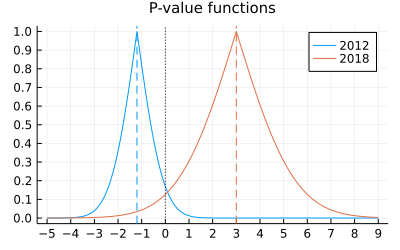

In [16]:
plot()
m, x̄, sx² = 111, 149.9, 7.1^2
n, ȳ, sy² = 131, 151.1, 6.3^2
plot(Δμ -> pvalue_welch(m, x̄, sx², n, ȳ, sy²; Δμ), -5, 9; label="2012", c=1)
vline!([x̄-ȳ]; label="", ls=:dash, c=1)
m, x̄, sx² = 31, 153.1, 7.9^2
n, ȳ, sy² = 19, 150.1, 5.7^2
plot!(Δμ -> pvalue_welch(m, x̄, sx², n, ȳ, sy²; Δμ), -5, 9; label="2018", c=2)
vline!([x̄-ȳ]; label="", ls=:dash, c=2)
plot!(; xtick=-100:1:100, ytick=0:0.1:1)
vline!([0]; label="", ls=:dot, c=:black)
title!("P-value functions")

#### R言語による12歳の男子と女子の平均身長の差に関する必修問題の解答例

以下のように与えられた $m, \xbar, s_x^2$ に対して, そのような標本平均と不偏分散を持つ擬似的なデータを構成すれば `t.test` 函数で容易に計算できる.

In [17]:
function fakedata(m, x̄, sx²)
    if isodd(m)
        [(x̄ + (-1)^k*√sx² for k in 1:m-1)...; x̄]
    else
        [(x̄ + (-1)^k*√sx² for k in 1:m-2)...; x̄-√(sx²/2); x̄+√(sx²/2)]
    end
end

@show x = fakedata(7, 10, 3^2)
@show length(x), mean(x), std(x)
println()
@show x = fakedata(6, 10, 3^2)
@show length(x), mean(x), std(x);

x = fakedata(7, 10, 3 ^ 2) = [7.0, 13.0, 7.0, 13.0, 7.0, 13.0, 10.0]
(length(x), mean(x), std(x)) = (7, 10.0, 3.0)

x = fakedata(6, 10, 3 ^ 2) = [7.0, 13.0, 7.0, 13.0, 7.878679656440358, 12.121320343559642]
(length(x), mean(x), std(x)) = (6, 10.0, 3.0)


In [18]:
# (1), (2)
m, x̄, sx² = 111, 149.9, 7.1^2
n, ȳ, sy² = 131, 151.1, 6.3^2
x = fakedata(m, x̄, sx²)
y = fakedata(n, ȳ, sy²)
@show length(x), mean(x), std(x)
@show length(y), mean(y), std(y)
@rput x y
R"""
t.test(x, y, conf.level=0.95)
"""

(length(x), mean(x), std(x)) = (111, 149.89999999999998, 7.099999999999997)
(length(y), mean(y), std(y)) = (131, 151.1, 6.300000000000011)


RObject{VecSxp}

	Welch Two Sample t-test

data:  x and y
t = -1.3791, df = 222.09, p-value = 0.1692
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -2.9147622  0.5147622
sample estimates:
mean of x mean of y 
    149.9     151.1 



In [19]:
# (3), (4)
m, x̄, sx² = 31, 153.1, 7.9^2
n, ȳ, sy² = 19, 150.1, 5.7^2
x = fakedata(m, x̄, sx²)
y = fakedata(n, ȳ, sy²)
@show length(x), mean(x), std(x)
@show length(y), mean(y), std(y)
@rput x y
R"""
t.test(x, y, conf.level=0.95)
"""

(length(x), mean(x), std(x)) = (31, 153.1, 7.900000000000006)
(length(y), mean(y), std(y)) = (19, 150.1, 5.699999999999989)


RObject{VecSxp}

	Welch Two Sample t-test

data:  x and y
t = 1.5548, df = 46.588, p-value = 0.1268
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.8826927  6.8826927
sample estimates:
mean of x mean of y 
    153.1     150.1 



#### 12歳の男子と女子の平均身長の差に関する必修問題の解答例

(1) 0.1692

(2) \[-2.9148, 0.5148\]

(3) 0.1268

(4) \[-0.8827, 6.8827\]

(5) 後者の信頼区間の幅の方がかなり広くなっている.  その理由はデータのサイズの違いになると考えられる.  前者の2012年のデータは男子111人と女子131人のデータだったが, 後者の2018年のデータは男子31人と女子19人のデータだった.

__注意:__ このことから, データの要約値を報告する場合には必ずデータのサイズの情報も報告する必要があることがわかる.

__注意:__ 以上の計算結果は通常「そのデータだけからは, 2012年と2018年における12歳の男子と女子の平均身長に差があるかどうかは分からない」と解釈される.

## Welchの t 検定での第一種の過誤の確率の視覚化

平均 $\mu_{x,0}$ の分布 $D_x$ でサイズ $m$ のサンプルを, 平均 $\mu_{y,0}$ の分布 $D_y$ でサイズ $n$ のサンプルを大量に生成して, そのサンプル達に関する「平均の差は $\mu_x-\mu_y=\mu_{x,0}-\mu_{y,0}$ えある」という仮説のWelchの $t$ 検定におけるP値が有意水準 $α$ 以下(未満でも同じ)になる確率(第一種の過誤の確率と呼ばれる)を求めてプロットしてみよう.

理想的には第一種の過誤の確率は有意水準に等しくなって欲しいが, Welchの $t$ 検定は中心極限定理や対数の法則を使った近似を使っているので, データのサイズが十分に大きくない場合には誤差が生じてしまう. 

その様子をグラフで確認することが以下の目標である.

大まかな傾向として, 左右の非対称性が大きな分布ほど, 誤差を小さくするためにはサンプルサイズを大きくする必要がある.

  1.079746 seconds (2.41 M allocations: 158.409 MiB, 2.99% gc time, 81.42% compilation time)


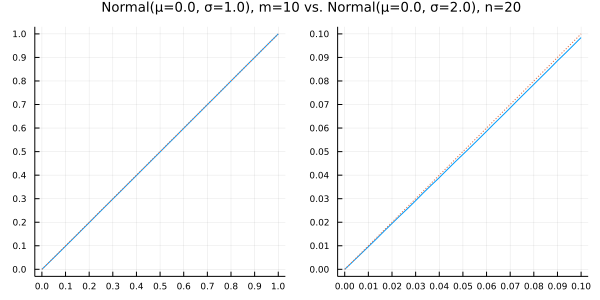

In [20]:
@time plot_prob_type_I_error_welch()

  0.451260 seconds (375.75 k allocations: 43.023 MiB, 3.34% gc time, 36.62% compilation time)


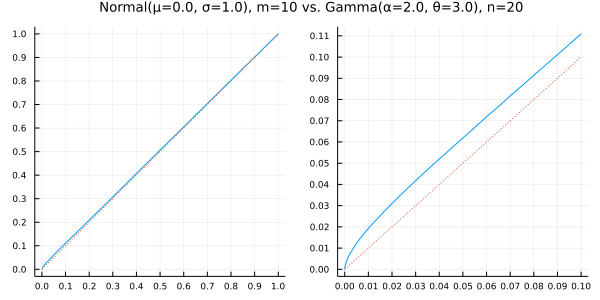

In [21]:
@time plot_prob_type_I_error_welch(disty=Gamma(2,3))

  0.369768 seconds (17.30 k allocations: 23.700 MiB)


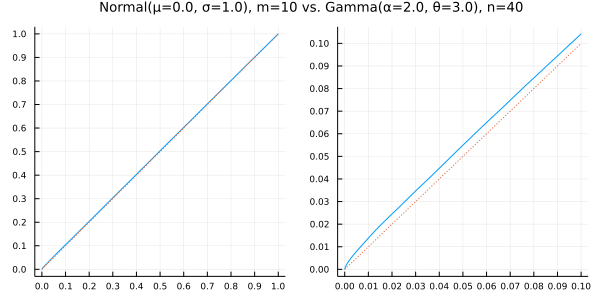

In [22]:
@time plot_prob_type_I_error_welch(disty=Gamma(2,3), n=40)

  0.553447 seconds (13.47 k allocations: 23.628 MiB)


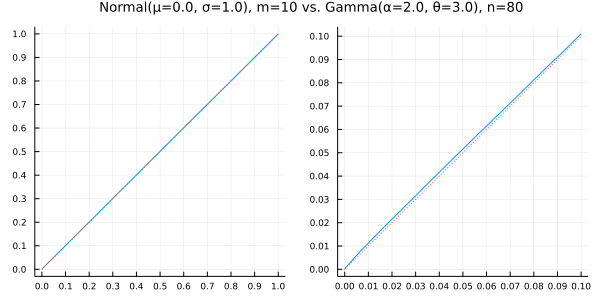

In [23]:
@time plot_prob_type_I_error_welch(disty=Gamma(2,3), n=80)

  0.268539 seconds (41.74 k allocations: 24.900 MiB, 10.25% compilation time)


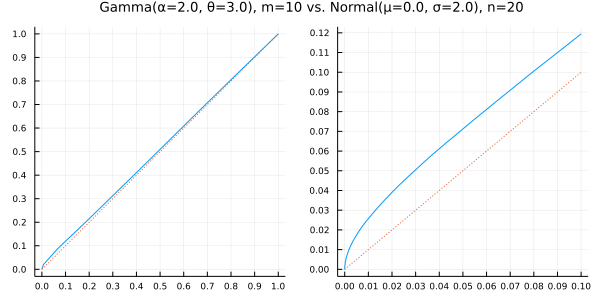

In [24]:
@time plot_prob_type_I_error_welch(distx=Gamma(2,3))

  0.581800 seconds (13.47 k allocations: 23.628 MiB)


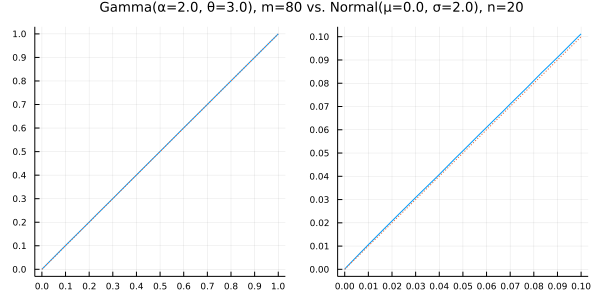

In [25]:
@time plot_prob_type_I_error_welch(distx=Gamma(2,3), m=80)

  0.359192 seconds (34.13 k allocations: 24.704 MiB, 9.93% compilation time)


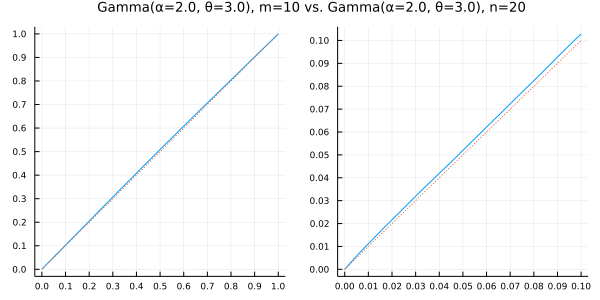

In [26]:
@time plot_prob_type_I_error_welch(distx=Gamma(2,3), disty=Gamma(2,3))

  0.319268 seconds (13.47 k allocations: 23.621 MiB)


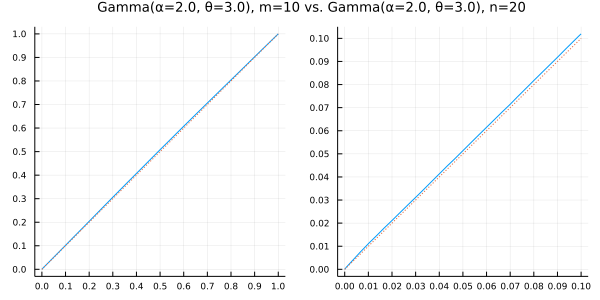

In [27]:
@time plot_prob_type_I_error_welch(distx=Gamma(2,3), disty=Gamma(2,3))

  0.312273 seconds (39.69 k allocations: 24.891 MiB, 8.51% compilation time)


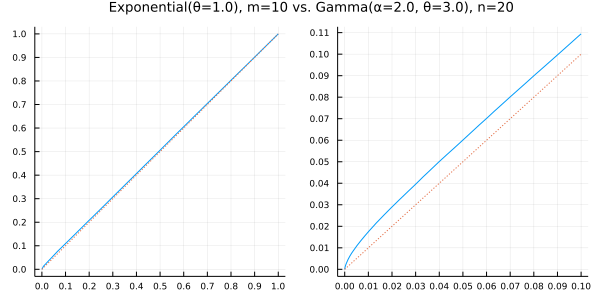

In [28]:
@time plot_prob_type_I_error_welch(distx=Exponential(), disty=Gamma(2,3))

  0.399878 seconds (13.46 k allocations: 23.623 MiB, 3.94% gc time)


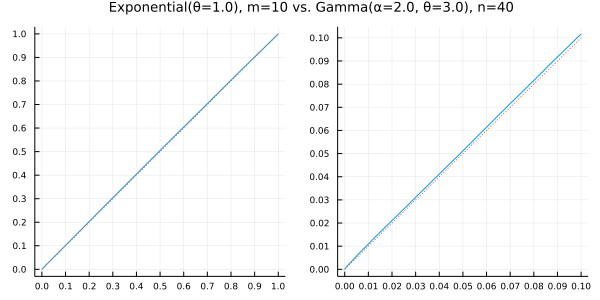

In [29]:
@time plot_prob_type_I_error_welch(distx=Exponential(), disty=Gamma(2,3), n=40)

  0.312329 seconds (57.16 k allocations: 25.759 MiB, 8.01% gc time, 13.14% compilation time)


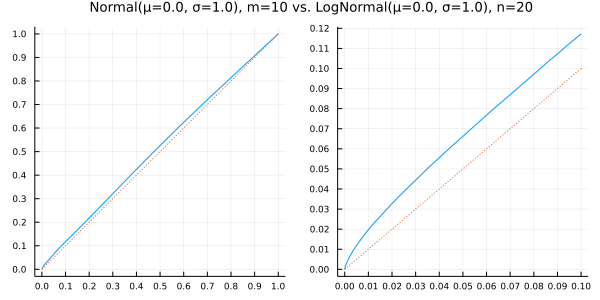

In [30]:
@time plot_prob_type_I_error_welch(disty=LogNormal())

  0.355014 seconds (13.47 k allocations: 23.631 MiB)


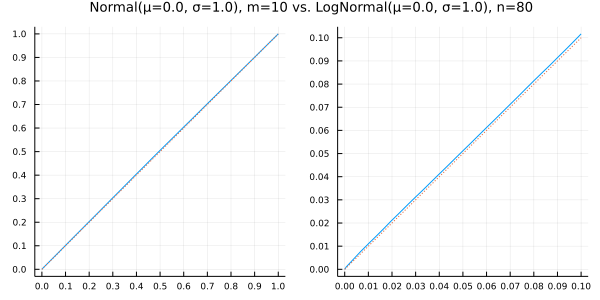

In [31]:
@time plot_prob_type_I_error_welch(disty=LogNormal(), n=80)

  0.285750 seconds (36.99 k allocations: 24.839 MiB, 4.62% gc time, 9.90% compilation time)


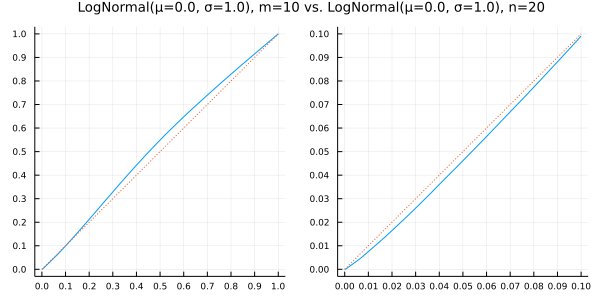

In [32]:
@time plot_prob_type_I_error_welch(distx=LogNormal(), disty=LogNormal())

  0.370134 seconds (17.30 k allocations: 23.703 MiB)


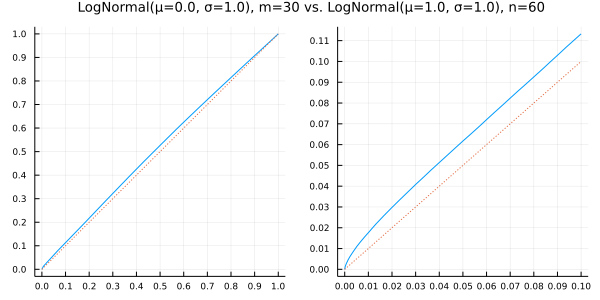

In [33]:
@time plot_prob_type_I_error_welch(distx=LogNormal(), m=30, disty=LogNormal(1), n=60)

  0.851806 seconds (17.30 k allocations: 23.724 MiB)


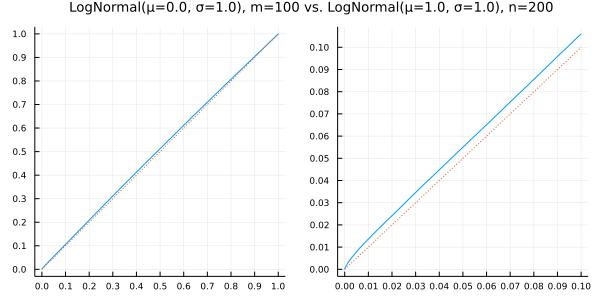

In [34]:
@time plot_prob_type_I_error_welch(distx=LogNormal(), m=100, disty=LogNormal(1), n=200)

  2.306550 seconds (13.47 k allocations: 23.703 MiB, 0.51% gc time)


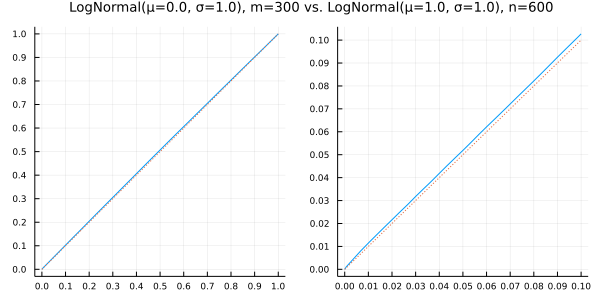

In [35]:
@time plot_prob_type_I_error_welch(distx=LogNormal(), m=300, disty=LogNormal(1), n=600)

## Welchの t 検定で使う自由度の式の導出